In [1]:
#lets import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:

df=pd.read_csv("data/insurance.csv")

In [3]:
df.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


In [4]:
df.tail(3)

,age,sex,bmi,children,smoker,region,expenses
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [10]:
df.duplicated().sum()

1

In [14]:
df[df.duplicated()==True]

,age,sex,bmi,children,smoker,region,expenses


In [12]:
#remove duplicate values
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(1337, 7)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.00,27.00,39.00,51.00,64.00
bmi,1337.0,30.665520,6.100664,16.00,26.30,30.40,34.70,53.10
children,1337.0,1.095737,1.205571,0.00,0.00,1.00,2.00,5.00
expenses,1337.0,13279.121638,12110.359657,1121.87,4746.34,9386.16,16657.72,63770.43


In [16]:
#seperate numerical and categorical columns
categorical_features = df.select_dtypes(include='object').columns
numerical_features = df.select_dtypes(exclude='object').columns
print(categorical_features)
print(numerical_features)

Index(['sex', 'smoker', 'region'], dtype='object')
Index(['age', 'bmi', 'children', 'expenses'], dtype='object')


In [17]:
#check unique value of categorical features
for i in categorical_features:
    print(i,df[i].unique())

sex ['female' 'male']
smoker ['yes' 'no']
region ['southwest' 'southeast' 'northwest' 'northeast']


In [18]:
#check value counts for categorical features
for i in categorical_features:
    print(i + ':')
    print(df[i].value_counts())
    print("_"*50)

sex:
sex
male      675
female    662
Name: count, dtype: int64
__________________________________________________
smoker:
smoker
no     1063
yes     274
Name: count, dtype: int64
__________________________________________________
region:
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64
__________________________________________________


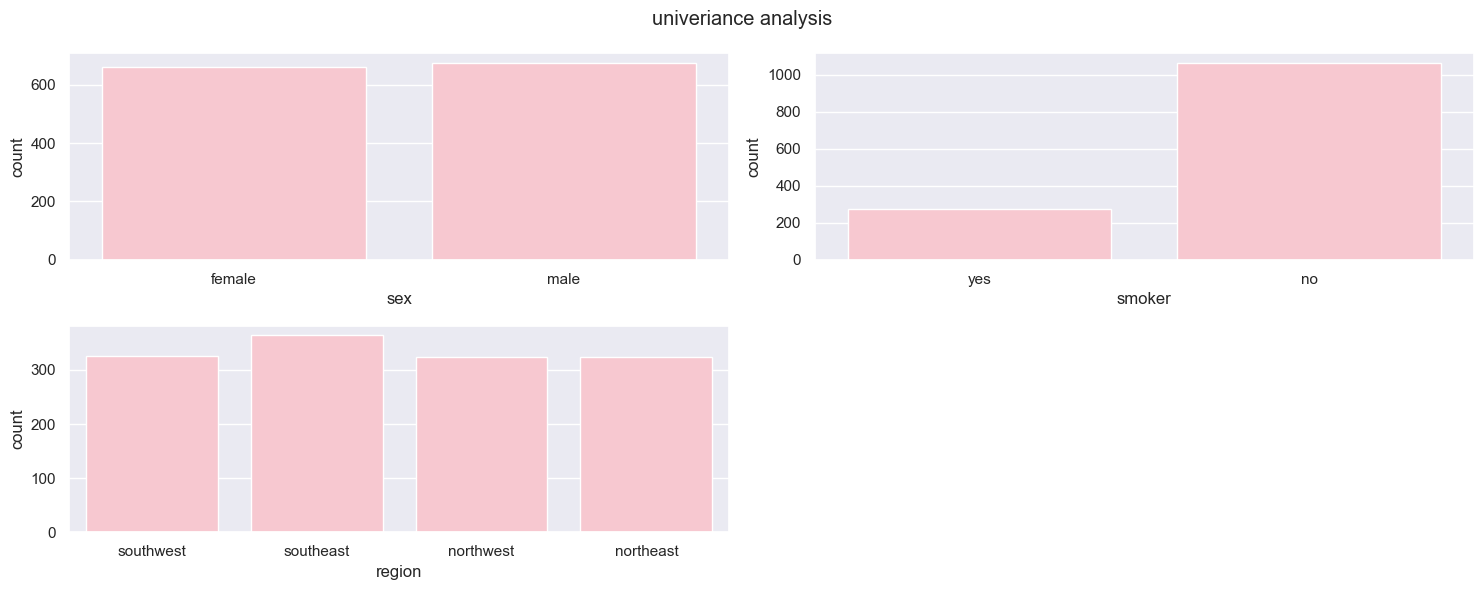

In [19]:
#univariate analysis
plt.suptitle("univeriance analysis")
for i in range(len(categorical_features)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[categorical_features[i]],color='pink')
    plt.tight_layout()

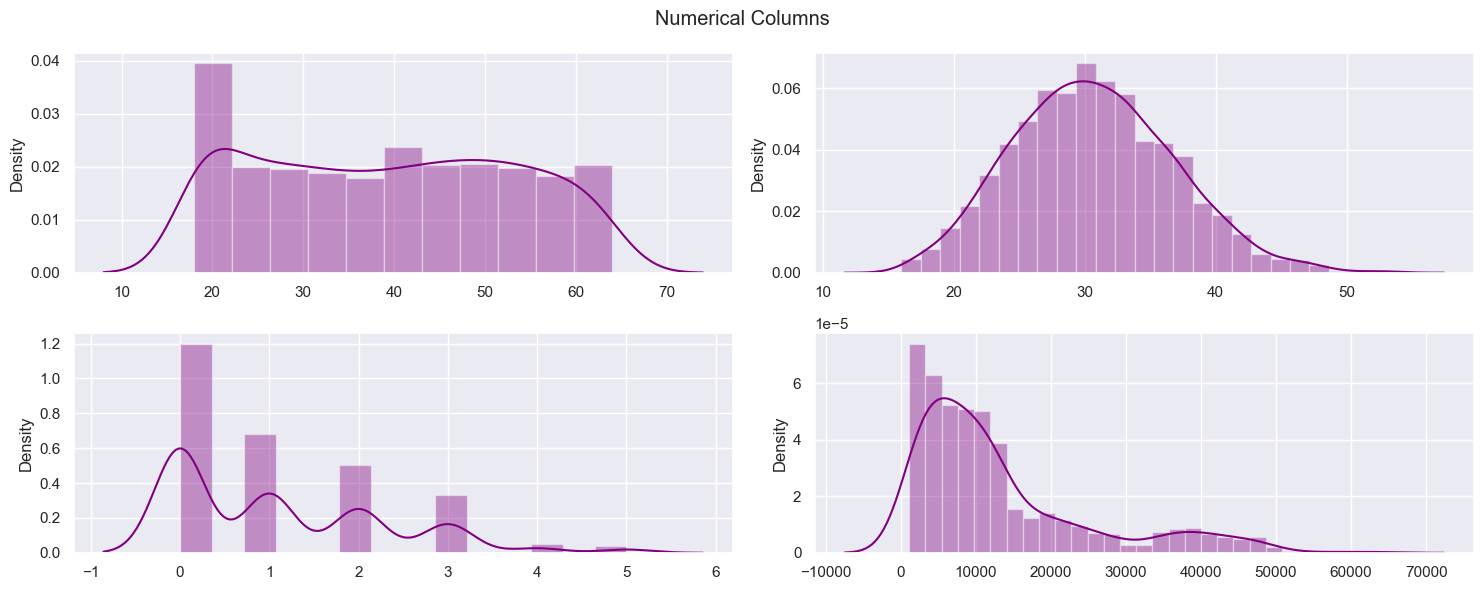

In [20]:
plt.suptitle("Numerical Columns")
for i in range(len(numerical_features)):
    plt.subplot(2,2,i+1)
    sns.distplot(x=df[numerical_features[i]],color='purple')
    plt.tight_layout()

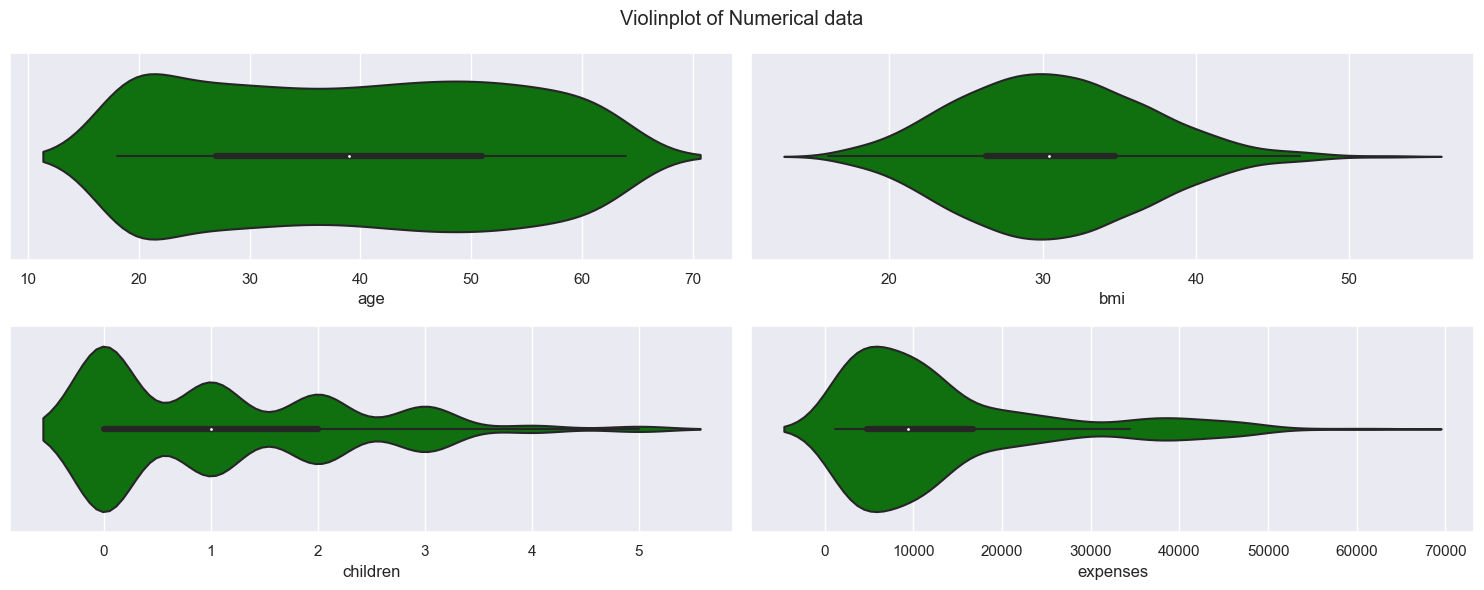

In [21]:
plt.suptitle("Violinplot of Numerical data")
for i in range(len(numerical_features)):
    plt.subplot(2,2,i+1)
    sns.violinplot(x=df[numerical_features[i]],color='green')
    plt.tight_layout()

In [ ]:
plt.suptitle("Boxplot of numerical data")
for i in range(len(numerical_features)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[numerical_features[i]],color='orange')
    plt.tight_layout()

In [22]:
#now we'll check if we have to remove outliers or not.
#In this I dont think we should remove it coz we don't have enough data

<Axes: xlabel='age', ylabel='expenses'>

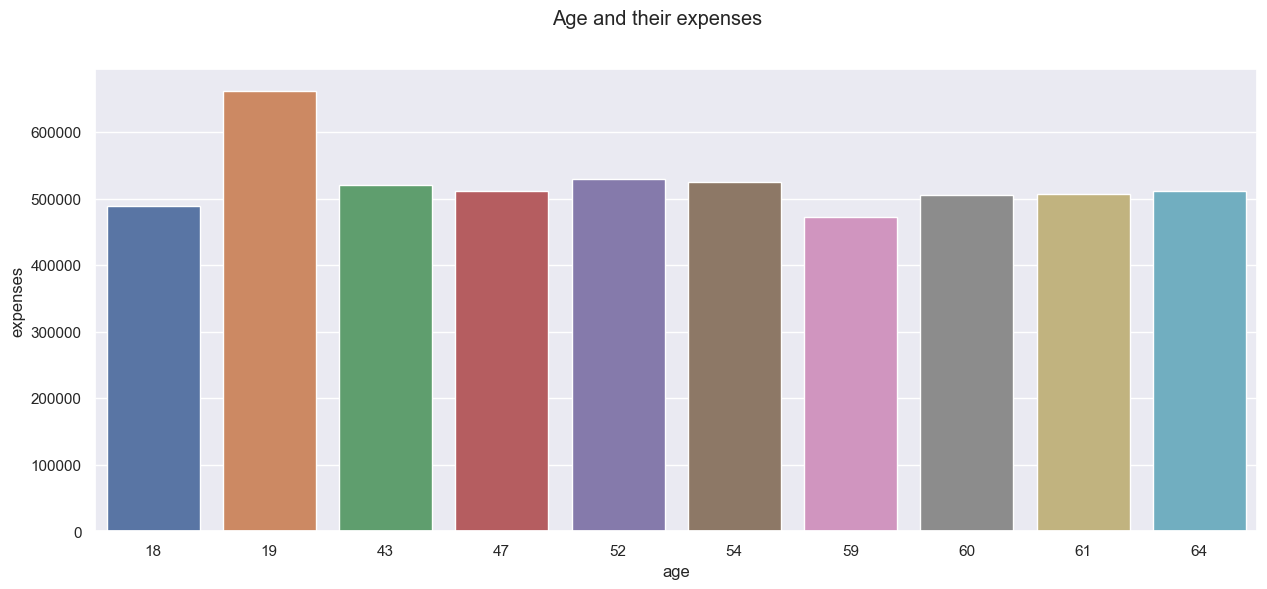

In [23]:
plt.suptitle("Age and their expenses")
data1 = df.groupby('age')['expenses'].sum().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x='age',y='expenses',data=data1)

<Axes: title={'center': 'BMI and their expenses'}, xlabel='bmi', ylabel='expenses'>

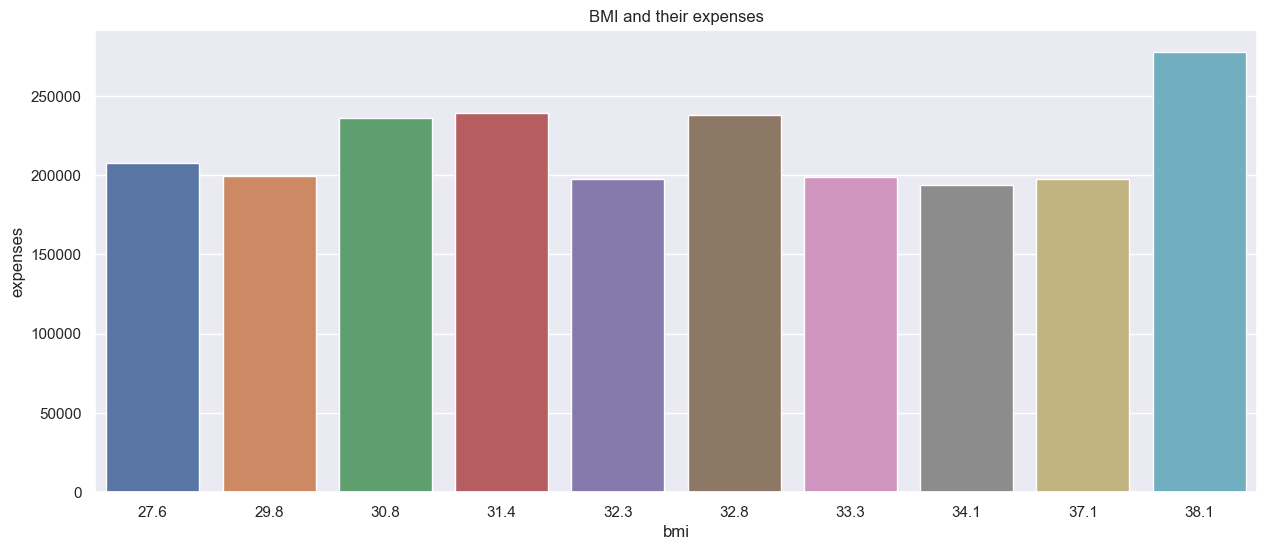

In [24]:
plt.title("BMI and their expenses")
data2 = df.groupby("bmi")['expenses'].sum().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x='bmi',y='expenses',data=data2)


<Axes: title={'center': 'children and there expenses'}, xlabel='children', ylabel='expenses'>

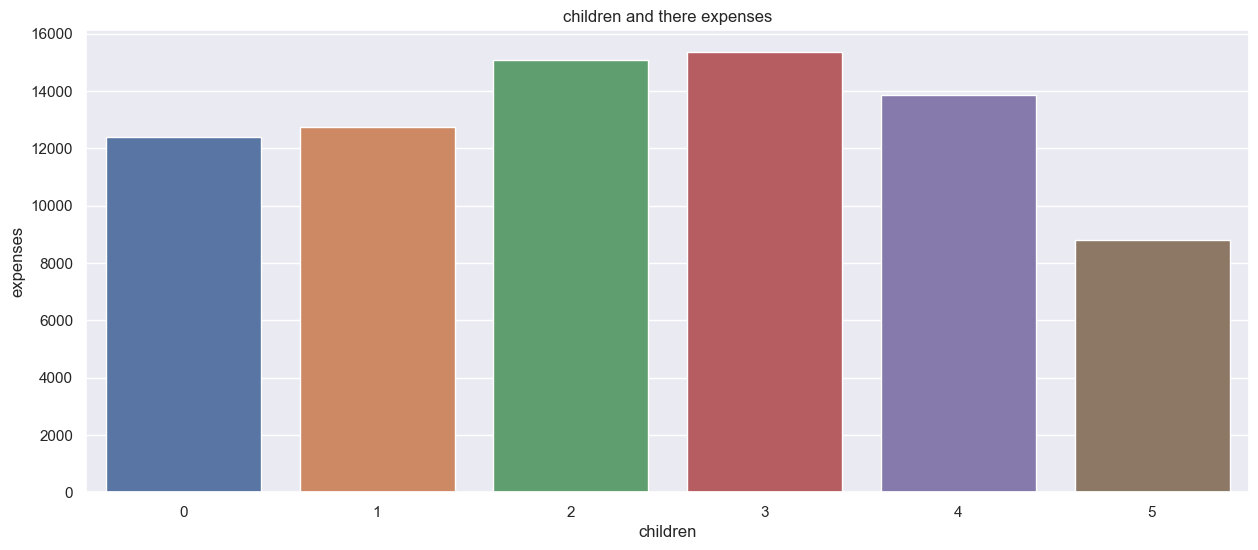

In [25]:
plt.title("children and there expenses")
data3 = df.groupby("children")["expenses"].mean().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x="children",y="expenses",data=data3)

In [26]:

#encode the categorical data to numerical data
df['smoker']=df['smoker'].map({'no':0,'yes':1})
df['sex']=df['sex'].map({'female':0,'male':1})

In [27]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


<Axes: title={'center': 'expenses with sex'}, xlabel='sex', ylabel='expenses'>

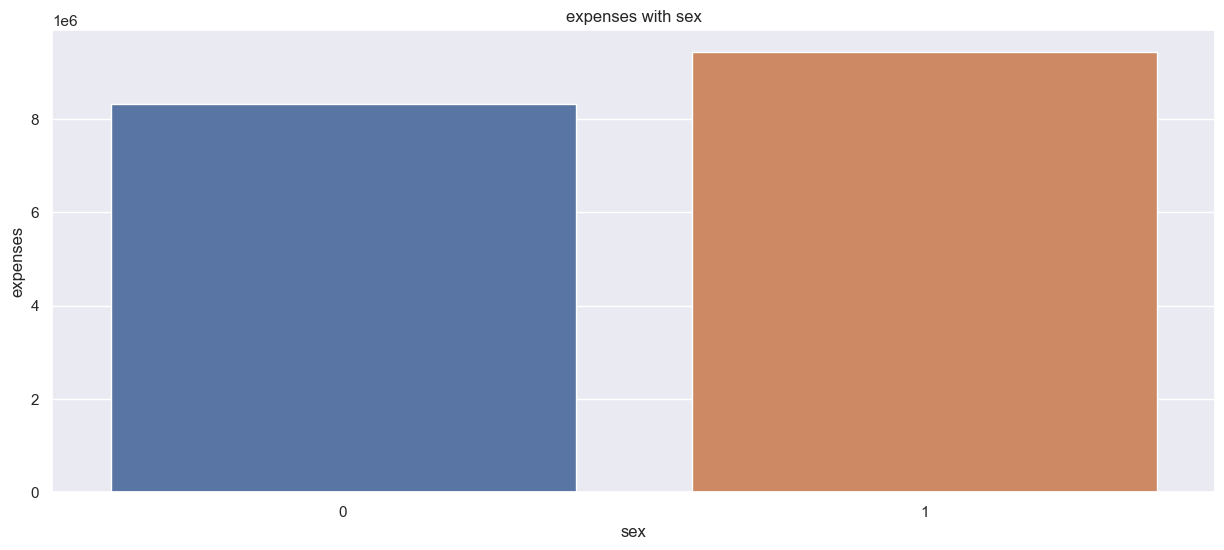

In [28]:
plt.title("expenses with sex")
data4=df.groupby('sex')['expenses'].sum().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x='sex',y='expenses',data=data4)

<Axes: title={'center': 'expenses with smoker'}, xlabel='smoker', ylabel='expenses'>

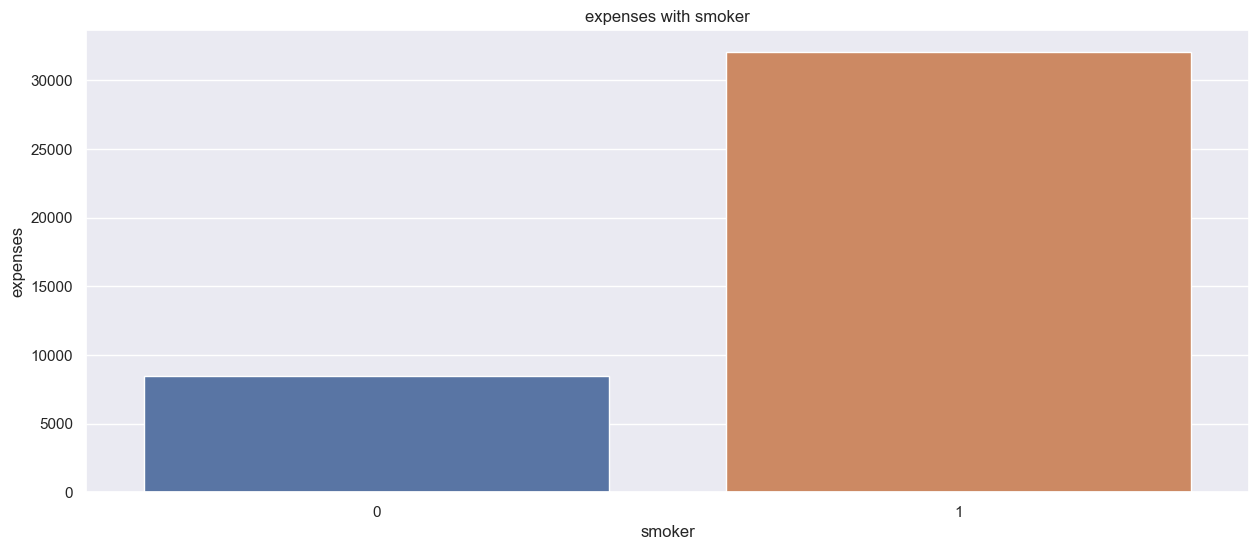

In [30]:
plt.title("expenses with smoker")
data5=df.groupby('smoker')['expenses'].mean().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x='smoker',y='expenses',data=data5)
            

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 83.6+ KB


In [32]:
file_path = 'data/cleaned.csv'
df.to_csv(file_path, encoding='utf-8', index=False)